In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

defaultFontSize = 17

plt.rc('font', size=defaultFontSize) #controls default text size
plt.rc('axes', titlesize=defaultFontSize) #fontsize of the title
plt.rc('axes', labelsize=defaultFontSize+2) #fontsize of the x and y labels
plt.rc('xtick', labelsize=defaultFontSize) #fontsize of the x tick labels
plt.rc('ytick', labelsize=defaultFontSize) #fontsize of the y tick labels
plt.rc('legend', fontsize=defaultFontSize) #fontsize of the legend

cmapbins = '#250a43' #color for histogram bins

charginos = pd.read_csv('charginos.csv')

trackedCharginos = charginos.copy()

trackedCharginos = trackedCharginos[['mass', 'ctau', 'ctau*boost', 'validHits', 'event', 'run', 'luminosityBlock', 'pt', 'eta', 'phi', 'trackPt', 'trackEta', 'trackPhi', 'beta', 'gamma']]

trackedCharginos = trackedCharginos[trackedCharginos['validHits'] != 0]

trackedCharginos.sort_values('ctau', inplace=True)

trackedCharginos.head(15)

,mass,ctau,ctau*boost,validHits,event,run,luminosityBlock,pt,eta,phi,trackPt,trackEta,trackPhi,beta,gamma
7501,700.048,11.0039,8.4101,3,5645,1,1,914.181,0.062181,-2.086960,373.9390,0.062668,-2.086760,0.794519,1.64680
3989,700.048,11.0048,19.7510,3,2971,1,1,386.137,-0.142249,1.333050,60.9602,-0.141804,1.331470,0.486725,1.14475
11005,700.048,11.1074,33.5790,3,8322,1,1,227.429,-0.190432,-1.717400,35.5164,-0.190274,-1.718940,0.314050,1.05329
7985,700.048,11.1382,15.8430,3,6019,1,1,489.597,-0.102262,-0.368026,119.9310,-0.102871,-0.366856,0.575128,1.22240
11690,700.048,11.1721,12.5950,3,8835,1,1,612.979,-0.161204,-2.633010,242.8450,-0.160425,-2.633440,0.663585,1.33672
506,700.048,11.2341,16.1320,3,377,1,1,483.776,-0.124043,-0.579850,27.7021,-0.124958,-0.576870,0.571469,1.21859
6991,700.048,11.3609,28.1480,3,5254,1,1,276.489,-0.208977,1.048150,48.8360,-0.208910,1.046470,0.374277,1.07838
3590,700.048,11.3646,6.5202,3,2674,1,1,1220.160,-0.004813,-1.897630,194.1840,-0.003818,-1.897280,0.867382,2.00948
158,700.048,11.4335,17.7390,3,124,1,1,423.948,-0.356724,2.715100,35.1592,-0.356211,2.712930,0.541759,1.18972
7674,700.048,11.4476,24.9880,3,5782,1,1,315.319,0.184632,1.124670,26.0839,0.184522,1.120620,0.416498,1.09994


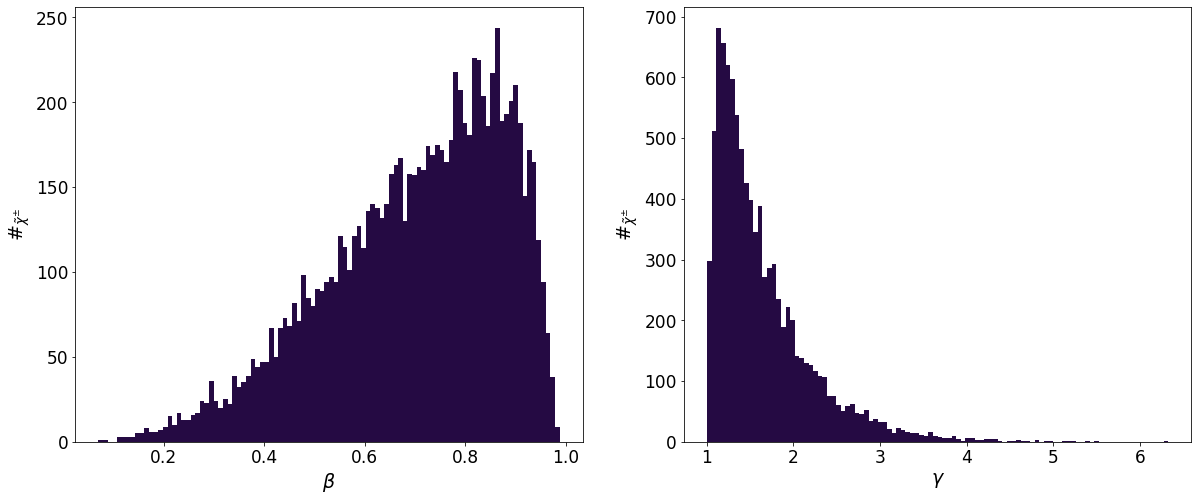

In [59]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

_,_,im = ax.hist(trackedCharginos['beta'], bins=100, color=cmapbins)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

_,_,im = ax.hist(trackedCharginos['gamma'], bins=100, color=cmapbins)

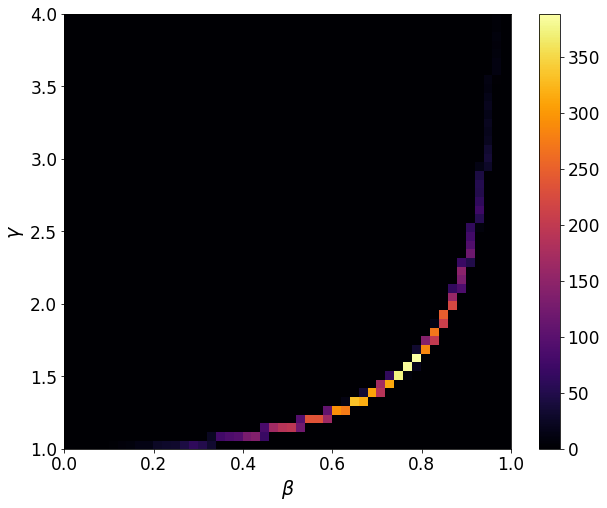

In [60]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\gamma$')

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['gamma'], bins=50,range=[[0,1],[1,4]], cmap='inferno')
fig.colorbar(im)

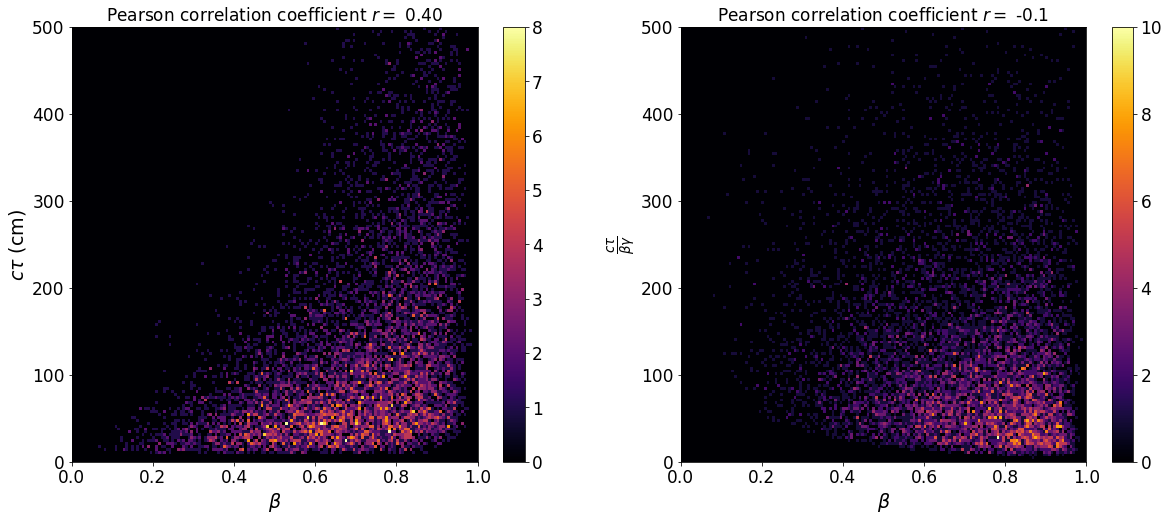

In [69]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$c\tau$ (cm)')

ctauCorr = np.corrcoef(trackedCharginos['beta'], trackedCharginos['ctau'])
ax.title.set_text(r'Pearson correlation coefficient $r =$ %.4s' % (ctauCorr[0,1]))

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['ctau'], bins=150,range=[[0,1],[0,500]], cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\frac{c\tau}{\beta\gamma}$')

ctauBoostCorr = np.corrcoef(trackedCharginos['beta'], trackedCharginos['ctau*boost'])
ax.title.set_text(r'Pearson correlation coefficient $r =$ %.4s' % (ctauBoostCorr[0,1]))

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['ctau*boost'], bins=150,range=[[0,1],[0,500]], cmap='inferno')
fig.colorbar(im)

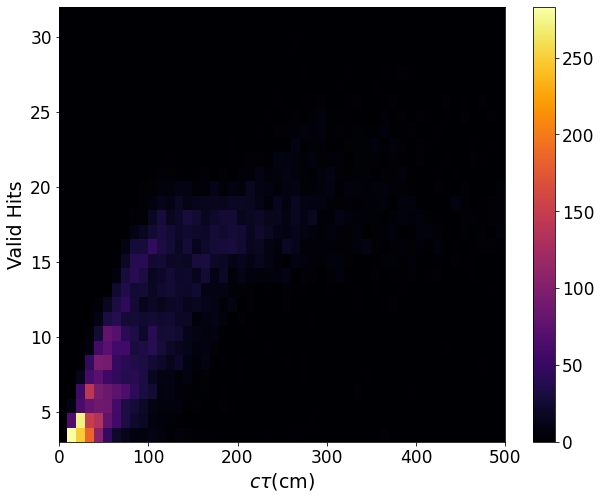

In [57]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$c\tau$(cm)')
ax.set_ylabel('Valid Hits')

_,_,_,im = ax.hist2d(trackedCharginos['ctau'], trackedCharginos['validHits'], bins=(50,30), range=[[0,500],[3,32]], cmap='inferno')
fig.colorbar(im)

<ErrorbarContainer object of 3 artists>

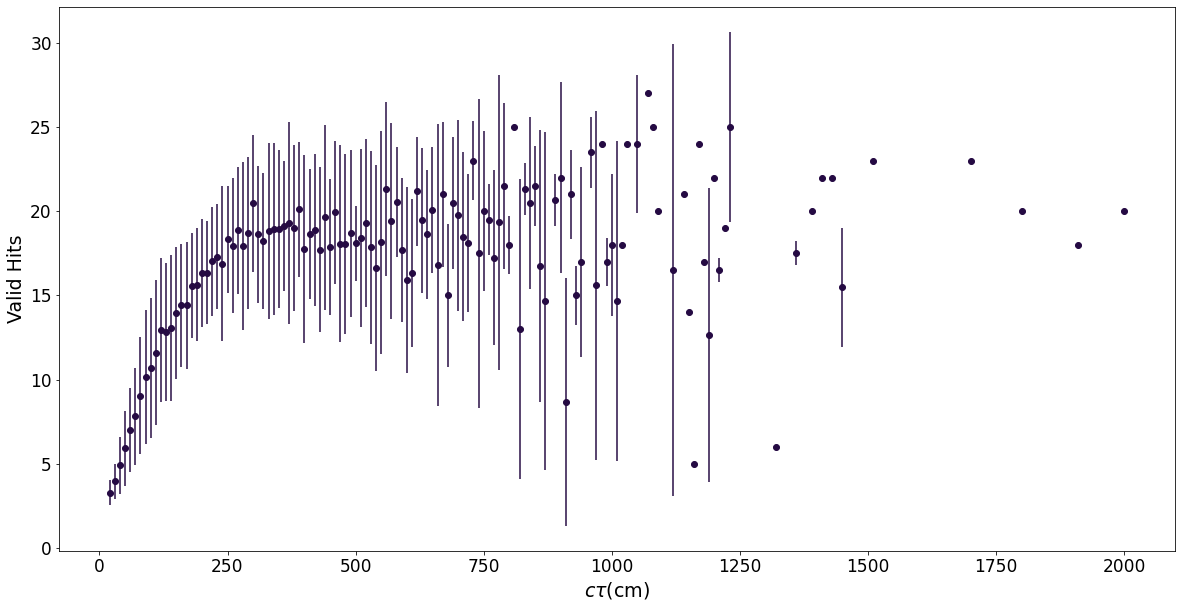

In [6]:
def createLabel10s(cTau):
    return (10 * np.ceil(cTau / 10))

trackedCharginos['cTauLabel10s'] = createLabel10s(trackedCharginos['ctau'])

cTau10cmMean = trackedCharginos.groupby('cTauLabel10s')['validHits'].mean()
cTau10cmStd = trackedCharginos.groupby('cTauLabel10s')['validHits'].std()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$c\tau$(cm)')
ax.set_ylabel('Valid Hits')

ax.errorbar(cTau10cmMean.index, cTau10cmMean, yerr=cTau10cmStd, color=cmapbins, marker='o', elinewidth=1.5, linewidth=0)

Positive resolution Charginos: 4004 ; Negative resolution Charginos: 5424


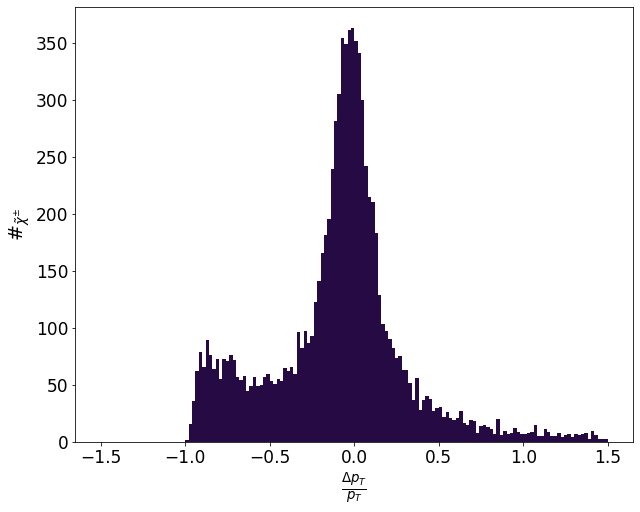

In [51]:
# Adding pt resolution to the dataframe
trackedCharginos['ptResolution'] = (trackedCharginos['trackPt'] - trackedCharginos['pt']) / trackedCharginos['pt']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

_,_,im = ax.hist(trackedCharginos['ptResolution'],range=(-1.5,1.5) , bins=150, color=cmapbins)

positiveDeltaPt = trackedCharginos[trackedCharginos['ptResolution']>0]
negativeDeltaPt = trackedCharginos[trackedCharginos['ptResolution']<0]

print(r'Positive resolution Charginos: %s ; Negative resolution Charginos: %s' % (positiveDeltaPt.shape[0], negativeDeltaPt.shape[0]))

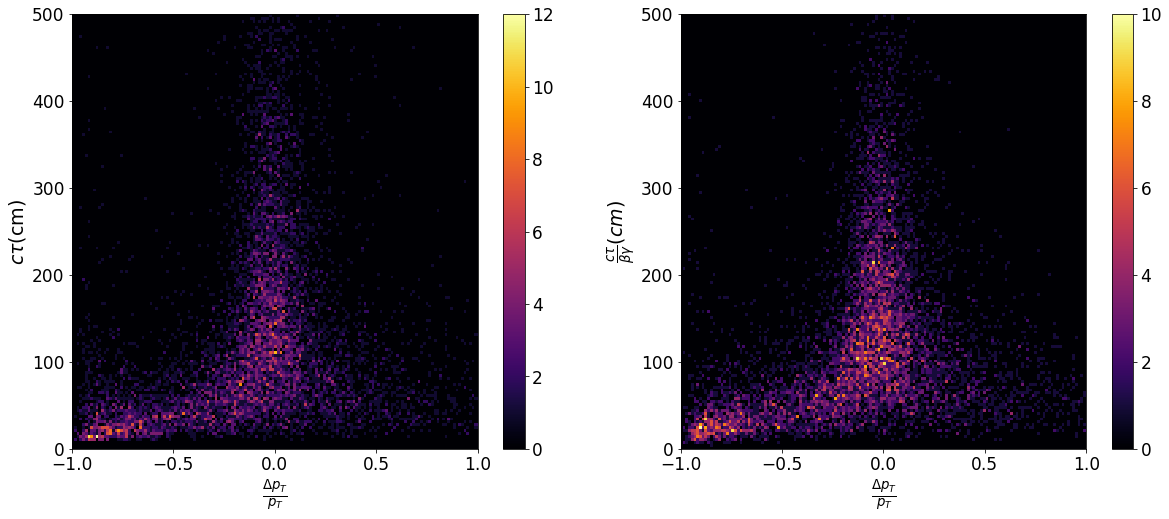

In [71]:
fig = plt.figure(figsize=(20,8))
xrange = 1

ax = fig.add_subplot(121)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$c\tau$(cm)')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['ctau'],range=((-1,xrange),(0,500)) , bins=150, cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$\frac{c\tau}{\beta\gamma} (cm)$')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['ctau*boost'],range=((-1,xrange),(0,500)) , bins=150, cmap='inferno')
fig.colorbar(im)

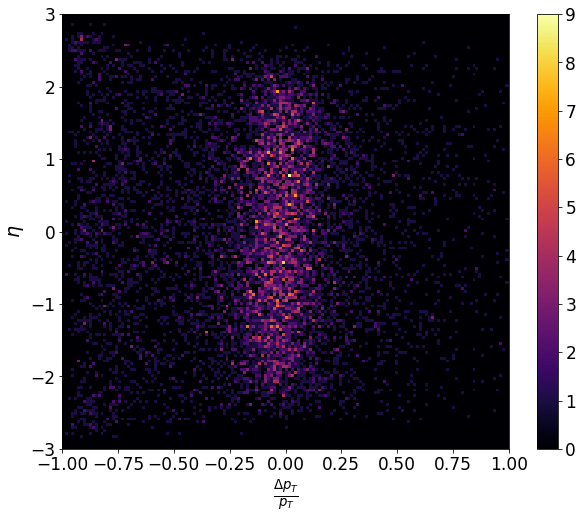

In [9]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$\eta$')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['eta'],range=((-1,1),(-3,3)) , bins=150, cmap='inferno')
fig.colorbar(im)

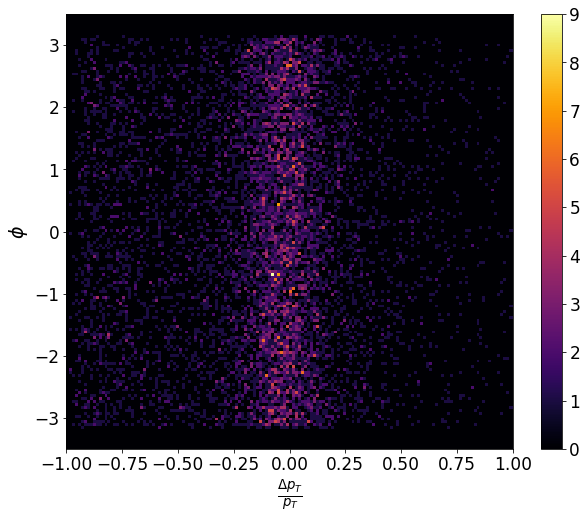

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$\phi$')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['phi'],range=((-1,1),(-3.5,3.5)) , bins=150, cmap='inferno')
fig.colorbar(im)

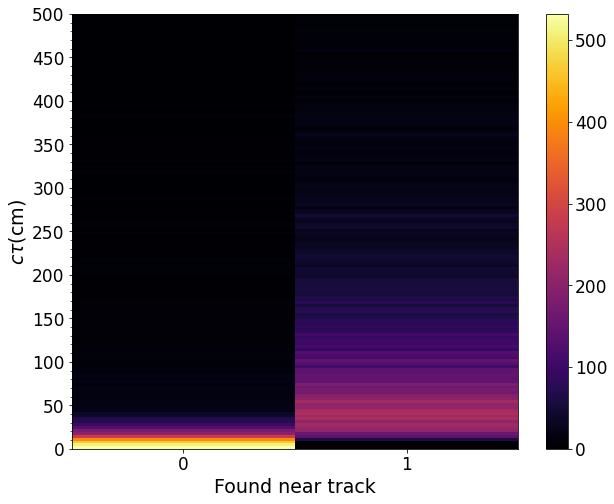

In [11]:
# Fazer plots de eficiência (dos charginos gerados quantos que achou track) em função com ctau, eta, phi

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel('Found near track')
ax.set_ylabel(r'$c\tau$(cm)')

xlimit = 1.5

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.set_xticks([0,1])
ax.set_yticks(np.linspace(0,500,11))
ax.set_yticks(np.linspace(0,500,51), minor=True)

_,_,_,im = ax.hist2d(charginos['foundNearTrack'],charginos['ctau'],range=((-.5,1.5),(0,500)) , bins=(2,150), cmap='inferno')
fig.colorbar(im)

In [12]:
def variableLabels(variable, interval):
    return (interval * np.ceil(variable / interval))

In [13]:
def variableEfficiency(particles, trackedParticles, variable, interval):
    tmpParticles = particles.copy()
    tmpTrackedParticles = trackedParticles.copy()
    
    tmpParticles['groupByLabel'] = variableLabels(tmpParticles[variable], interval)
    tmpTrackedParticles['groupByLabel'] = variableLabels(tmpTrackedParticles[variable], interval)
    
    particlesNumber = tmpParticles.groupby('groupByLabel')[variable].count()
    trackedParticlesNumber = tmpTrackedParticles.groupby('groupByLabel')[variable].count()
    
    recEfficiency = pd.DataFrame(particlesNumber)
    recEfficiency['trackedParticlesNumber'] = trackedParticlesNumber
    
    recEfficiency['trackedParticlesNumber'] = recEfficiency['trackedParticlesNumber'].replace(np.nan, 0)
    recEfficiency['efficiency'] = recEfficiency['trackedParticlesNumber'] / recEfficiency[variable]
    
    return recEfficiency

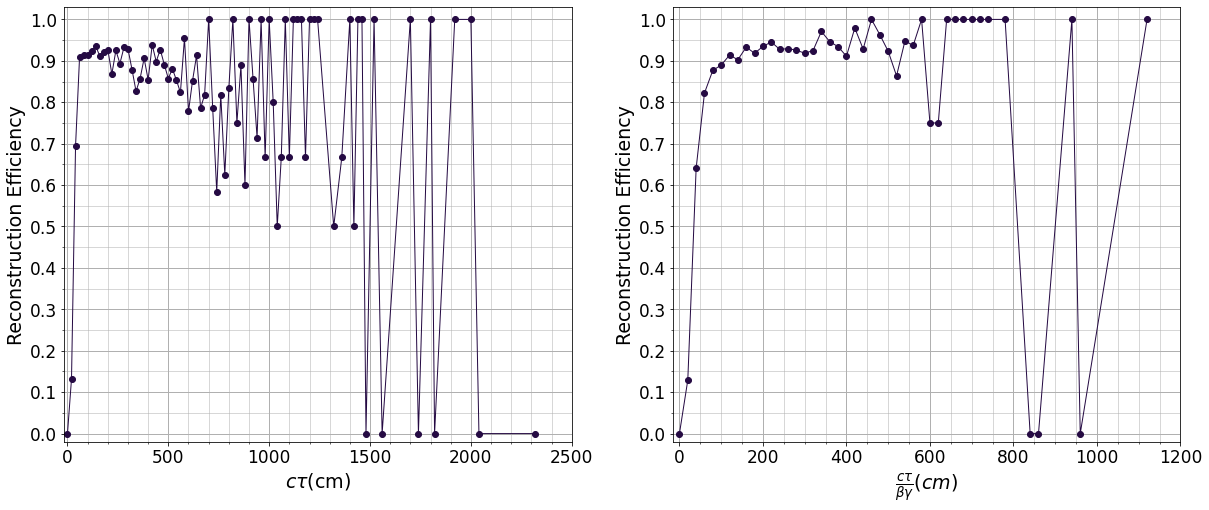

In [79]:
variableInterval = 20

recEfficiency = variableEfficiency(charginos, trackedCharginos, 'ctau', variableInterval)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$c\tau$(cm)')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-15,2500)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,2500,26), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,2500,6))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

recEfficiency = variableEfficiency(charginos, trackedCharginos, 'ctau*boost', variableInterval)
ax = fig.add_subplot(122)

ax.set_xlabel(r'$\frac{c\tau}{\beta\gamma} (cm)$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-15,1200)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,1200,25), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,1200,7))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

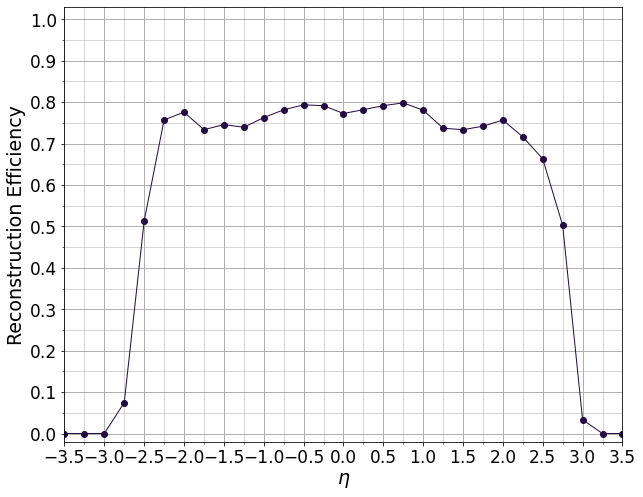

In [15]:
recEfficiency = variableEfficiency(charginos, trackedCharginos, 'eta', 0.25)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 3.5

ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(-xlimit,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(-xlimit,xlimit,15))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

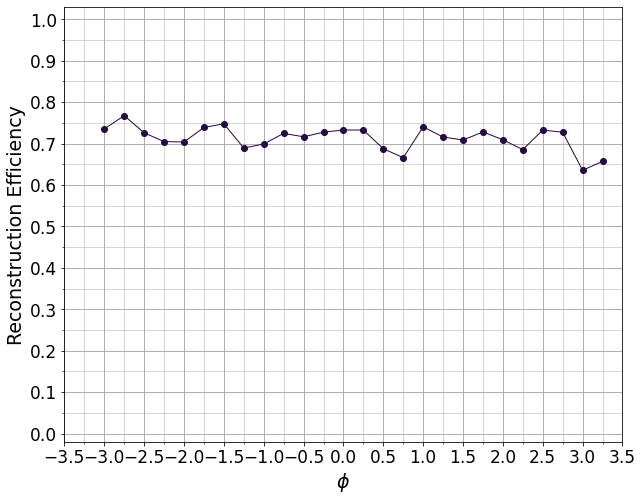

In [16]:
recEfficiency = variableEfficiency(charginos, trackedCharginos, 'phi', 0.25)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 3.5

ax.set_xlabel(r'$\phi$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(-xlimit,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(-xlimit,xlimit,15))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

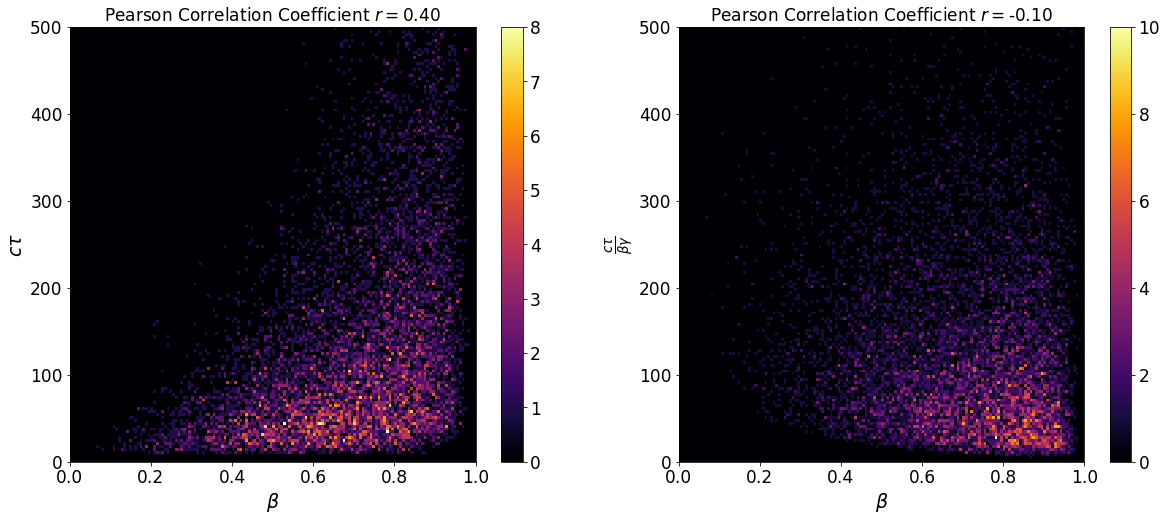